<a href="https://colab.research.google.com/github/Ebasurtos/MISTI/blob/main/BASURTO_SIUCE_Eder_WordEmbeddings_EXERCISES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content Challenge: Word Embeddings

Today, we'll learn about word embeddings, visualize them, train a simple embedding model, and see how embeddings help with language tasks. Let's start!


In [1]:
# Install required packagess
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 45.8 MB/s eta 0:00:00


In [2]:
# Import Packages

# Pre-trained Word Embedding Models
import gensim.downloader as api

# Word Embedding Functions
from gensim.models import Word2Vec

# Dimensionality Reduction Methods
from sklearn.decomposition import PCA

# General Packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## EXERCISE: Visualizing Pre-trained Word Embeddings

Here, we’ll use the `gensim` library to load a small set of pre-trained embeddings (e.g., Word2Vec).

Tasks:
1. Review the available pre-trained models from gensim using `print(api.info()['models'].keys())`, and select one of the models (e.g., 'fasttext-wiki-news-subwords-300'). You can look into the differences of each model. *Each model will have a different vocabulary, so keep that in mind.*
2. Load the selected pre-trained model.
3. Select a few words from the vocabulary of the pre-trained model (e.g. `["king", "queen", "man", "woman", "apple", "fruit"]`), extract their vectorized representation and then print them.
4. Using the dimensionality reduction technique **principle component analysis**, reduce the number of dimensions of the vectorized representations so the information is amenable to plotting (i.e., reduce the dimensions to 2 or 3).
5. Plot the dimensionality reduced vector representations.


### TASK 1: Select a pre-trained model

In [3]:
# TASK 1 EXERCISE

# List all pre-trained models available
api_info = api.info()
for model_name, model_data in api_info['models'].items():
    print(f"--- Model: {model_name} ---")
    print(f"Description: {model_data['description']}\n\n")

--- Model: fasttext-wiki-news-subwords-300 ---
Description: 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).


--- Model: conceptnet-numberbatch-17-06-300 ---
Description: ConceptNet Numberbatch consists of state-of-the-art semantic vectors (also known as word embeddings) that can be used directly as a representation of word meanings or as a starting point for further machine learning. ConceptNet Numberbatch is part of the ConceptNet open data project. ConceptNet provides lots of ways to compute with word meanings, one of which is word embeddings. ConceptNet Numberbatch is a snapshot of just the word embeddings. It is built using an ensemble that combines data from ConceptNet, word2vec, GloVe, and OpenSubtitles 2016, using a variation on retrofitting.


--- Model: word2vec-ruscorpora-300 ---
Description: Word2vec Continuous Skipgram vectors trained on full Russian National Corpus (about 250M words). The model contains 185K 

### TASK 2: Load the pre-trained model

In [4]:
# TASK 2 EXERCISE

# Load your selected pre-trained embeddings
w2v_model = api.load('word2vec-google-news-300')  # This loads the selected model

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### TASK 3: Extract the vectorized representations of sample words

In [7]:
# TASK 3 EXERCISE

words = list(w2v_model.index_to_key)
# print(words) # Commenting this out to avoid huge output

# Select a Few Words and Visualize Relationships

selected_words = ["king", "queen", "man", "woman", "apple", "fruit"]

# Extract vectorized representations
word_vectors = {word: w2v_model[word] for word in selected_words}

# Print the vectorized representations
for word, vector in word_vectors.items():
    print(f"Vector for '{word}': {vector[:5]}...") # Print first 5 elements for brevity

Vector for 'king': [ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477]...
Vector for 'queen': [ 0.00524902 -0.14355469 -0.06933594  0.12353516  0.13183594]...
Vector for 'man': [ 0.32617188  0.13085938  0.03466797 -0.08300781  0.08984375]...
Vector for 'woman': [ 0.24316406 -0.07714844 -0.10302734 -0.10742188  0.11816406]...
Vector for 'apple': [-0.06445312 -0.16015625 -0.01208496  0.13476562 -0.22949219]...
Vector for 'fruit': [-0.05834961  0.06787109 -0.05395508  0.33398438 -0.13574219]...


### TASK 4: Dimensionality Reduction

In [9]:
# TASK 4 EXERCISE

# Reduce dimensions to 2D for visualization

word_vectors_list = np.array(list(word_vectors.values()))

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors_list)

### TASK 5: Visualize the Vector Representations

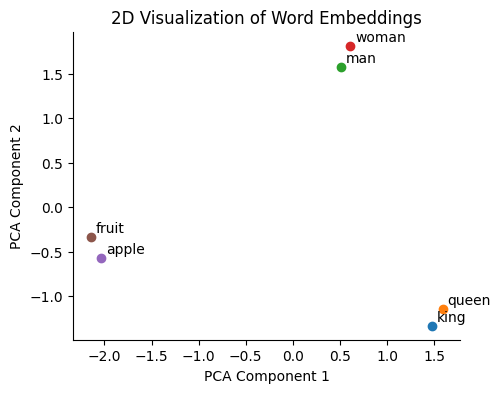

In [10]:
# TASK 5 EXERCISE

# Plot the Dimensionality Reduced Vector Representations
plt.figure(figsize=(5, 4))

for i, word in enumerate(selected_words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0] + 0.05, reduced_vectors[i, 1] + 0.05))

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
sns.despine()
plt.show()

## EXERCISE: Train a Simple Word2Vec Model


Tasks:
1. Design your own small text corpus either on your own, from an online source, or using some generative AI tool. This text corpus will be a `list` of sentence `strings`.
2. Tokenize the sentence into individual words.
3. Train a word embedding using `Word2Vec` from `gensim`, or another similar package.
4. Extract the word embeddings for a few example words from your trained model.
5. Visualize the embeddings from your newly trained model.
6. Repeat tasks 1-5 adjusting different parameters to see how it affects the embedding model that is trained. Example parameters or hyperparameters (if you are using the gensim package) that you can adjust include the following: `corpus`, `vector_size`, `window`, `min_count`, etc. Remember, if you increase the vector_size, you will need to do dimensionality reduction to visualize the embedded words.


### TASK 1: Define your corpus

In [12]:
# TASK 1 EXERCISE

corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "The dog barks at the fox.",
    "A brown fox is quick.",
    "A lazy dog sleeps.",
    "The cat sat on the mat.",
    "The quick cat chases the mouse."
]

### TASK 2: Tokenize the Corpus

In [14]:
# TASK 2 EXERCISE

# Tokenize the corpus

tokenized_corpus = [sentence.lower().split() for sentence in corpus]

### TASK 3: Train your own Word Embedding Model

In [15]:
# TASK 3 EXERCISE

# Initialize and train the Word2Vec model
my_w2v_model = Word2Vec(
    sentences = tokenized_corpus,   # Input corpus
    vector_size = 100,              # Dimensionality of word embeddings
    window = 5,                     # Context window size
    min_count = 1,                  # Ignore words with frequency lower than this
    workers = 4,                    # Use 4 CPU threads
    sg = 1                          # Skip-gram (1) or CBOW (0)
)

### TASK 4: Extract example word embeddings

In [16]:
# TASK 4 EXERCISE

# Define example words to extract embeddings for
example_words = ["fox", "dog", "cat", "quick", "lazy"]

# Create a dictionary to store the word vectors
my_word_vectors = {}
for word in example_words:
    if word in my_w2v_model.wv:
        my_word_vectors[word] = my_w2v_model.wv[word]
    else:
        print(f"Warning: '{word}' not in model vocabulary.")

# Convert the dictionary values to a NumPy array
word_embeddings = np.array(list(my_word_vectors.values()))

# Print the extracted embeddings (first 5 elements for brevity)
print("Extracted word embeddings:")
for word, vector in my_word_vectors.items():
    print(f"Vector for '{word}': {vector[:5]}...")

Extracted word embeddings:
Vector for 'fox': [-0.00873334  0.00213826 -0.00087206 -0.00931671 -0.00942319]...
Vector for 'dog': [-0.00824268  0.00929935 -0.00019766 -0.00196728  0.00460363]...
Vector for 'cat': [-0.00862409  0.0036656   0.00520106  0.00574324  0.00745713]...
Vector for 'quick': [ 0.00816812 -0.00444303  0.00898543  0.00825366 -0.00443522]...
Vector for 'lazy': [-0.0071401   0.00124122 -0.0071778  -0.00224496  0.00371987]...


### TASK 5: Visualize your Embeddings

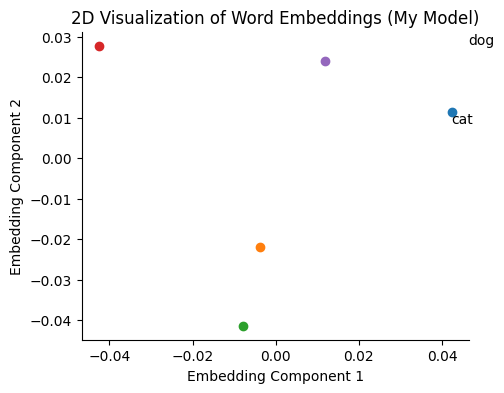

In [17]:
# TASK 5 EXERCISE

# Reduce dimensions for visualization (e.g., to 2D using PCA)
pca_my_model = PCA(n_components=2)
reduced_my_vectors = pca_my_model.fit_transform(word_embeddings)

# Plot the Dimensionality Reduced Vector Representations
plt.figure(figsize=(5, 4))

for i, word in enumerate(example_words):
    plt.scatter(reduced_my_vectors[i, 0], reduced_my_vectors[i, 1])
    plt.annotate(word, (reduced_my_vectors[i, 0] + 0.05, reduced_my_vectors[i, 1] + 0.05))

plt.title("2D Visualization of Word Embeddings (My Model)")
plt.xlabel("Embedding Component 1")
plt.ylabel("Embedding Component 2")
sns.despine()
plt.show()

## EXERCISE: Determine the Similarity of Sentences

Here, you will explore the concept of capturing the similarity of words and groups of words in vector space.

Tasks:
1. Calculate the most similar words of your pre-trained model `w2v_model` to an example word (e.g., king) from the model's vocabulary using pre-built functions from `gensim` or a package of your choice.
2. Calculate the similarity between two words in the vocabulary of your pre-trained model `w2v_model` (e.g., "king" and "queen" or "apple" and "fruit") using pre-built functions from `gensim` or a package of your choice.
3. Develop a method to calculate the similarity between two sentences (e.g., "king and queen" with "man and woman"). Consider how you can create a summary vector of a sentence. Here you can use the imported function `cosine` from `scipy.spatial.distance` once you have created a summary vector of each sentence.


### TASK 1: Find similar words to a given word

In [19]:
# TASK 1 EXERCISE
word_1 = "king"
word_2 = "apple"

similar_words_1 = w2v_model.most_similar(word_1)
similar_words_2 = w2v_model.most_similar(word_2)

print("Words similar to " + word_1 + ":", similar_words_1)
print("Words similar to " + word_2 + ":", similar_words_2)

Words similar to king: [('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]
Words similar to apple: [('apples', 0.720359742641449), ('pear', 0.6450697183609009), ('fruit', 0.6410146355628967), ('berry', 0.6302295327186584), ('pears', 0.613396167755127), ('strawberry', 0.6058260798454285), ('peach', 0.6025872826576233), ('potato', 0.5960935354232788), ('grape', 0.5935863852500916), ('blueberry', 0.5866668224334717)]


### TASK 2: Find the similarity between two words

In [20]:
# TASK 2 EXERCISE
word_to_compare_1 = "king"
word_to_compare_2 = "queen"

word_pair_similarity = w2v_model.similarity(word_to_compare_1, word_to_compare_2)

print("Similarity between " + word_to_compare_1 + " and " + word_to_compare_2 + ":", word_pair_similarity)

Similarity between king and queen: 0.6510957


### TASK 3: Find the similarity between two sentences

In [21]:
# TASK 3 EXERCISE

def sentence_vector(sentence, model):
    '''Create a function which, given a word embedding model, and a sentence,
       produces a vector representation of the sentence.
    '''
    words = [word for word in sentence.lower().split() if word in model.key_to_index]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean([model[word] for word in words], axis=0)

# Define two example sentences
sentence_1 = "king and queen"
sentence_2 = "man and woman"

# Calculate cosine similarity between the sentence embeddings
from scipy.spatial.distance import cosine

vector1 = sentence_vector(sentence_1, w2v_model)
vector2 = sentence_vector(sentence_2, w2v_model)
similarity = 1 - cosine(vector1, vector2)

print(f"Similarity between '{sentence_1}' and '{sentence_2}':", similarity)

Similarity between 'king and queen' and 'man and woman': 0.24791396
